In [1]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

In [2]:
datos = pd.DataFrame({"X":[114,118,126,130,136,140,148,156,160,164,170,178],"Y":[102,106,108,110,122,124,138,130,142,148,150,154]});datos

,X,Y
0,114,102
1,118,106
2,126,108
3,130,110
4,136,122
5,140,124
6,148,138
7,156,130
8,160,142
9,164,148


In [3]:
reg = linear_model.LinearRegression()

In [4]:
reg.fit(datos[["X"]],datos["Y"])

LinearRegression()

In [5]:
print("Coeficiente de regresión: ", reg.coef_[0],"\n","Incepcención: ",reg.intercept_)

Coeficiente de regresión:  0.8674147963424771 
 Incepcención:  2.0581878636741493


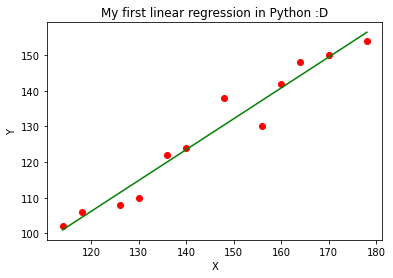

In [6]:
plt.scatter(datos["X"], datos["Y"], color = "red")
plt.plot(datos["X"], reg.predict(datos[["X"]]), color = "green")
plt.title("My first linear regression in Python :D")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


Existe otra paquetería más eficiente: statsmodel.api

In [7]:
import statsmodels.api as sm

In [8]:
x = sm.add_constant(datos["X"])
y = datos["Y"]

In [9]:
model = sm.OLS(y,x)

In [10]:
results = model.fit()

In [11]:
results.summary()

C:\Users\actda\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     206.8
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           5.24e-08
Time:                        18:04:58   Log-Likelihood:                -33.109
No. Observations:                  12   AIC:                             70.22
Df Residuals:                      10   BIC:                             71.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0582      8.829      0.233      0.820     -17.615      21.731
X              0.8674      0.060     14.381      0.000       0.733       1.002
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   2.549
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.041
Skew:                          -0.102   Prob(JB):                        0.980
Kurtosis:                       2.797   Cond. No.                     1.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
results.params

const    2.058188
X        0.867415
dtype: float64

Const = ALFA, X = Beta

In [19]:
results.conf_int(alpha = .05) 

,0,1
const,-17.614555,21.730931
X,0.733016,1.001813


In [20]:
results.conf_int(alpha = .95)

,0,1
const,1.490485,2.625891
X,0.863536,0.871293


---

EJERCICIO PARA LA CLASE DE ESTADÍSTICA
---

In [12]:
df_eje = pd.read_excel("EJERCICIO 1 REGRESION SIMPLE METODO CORTO V4 INTERVALOS   2021 (1).xls",sheet_name = "EJERCICIO",usecols = "B,C",skiprows = 23)
df_eje.head(3)

,X,Y
0,0.9,3.1
1,1.5,3.6
2,1.6,4.3


In [13]:
x_eje = sm.add_constant(df_eje["X"])
y_eje = df_eje["Y"]
regression = sm.OLS(y_eje,x_eje)
resultados = regression.fit()
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.730e+04
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           3.98e-51
Time:                        18:04:58   Log-Likelihood:                -18.198
No. Observations:                  30   AIC:                             40.40
Df Residuals:                      28   BIC:                             43.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0029      0.090      0.033      0.974      -0.182       0.187
X              2.6688      0.009    311.923      0.000       2.651       2.686
==============================================================================
Omnibus:                        0.616   Durbin-Watson:                   1.479
Prob(Omnibus):                  0.735   Jarque-Bera (JB):                0.058
Skew:                           0.025   Prob(JB):                        0.971
Kurtosis:                       3.210   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

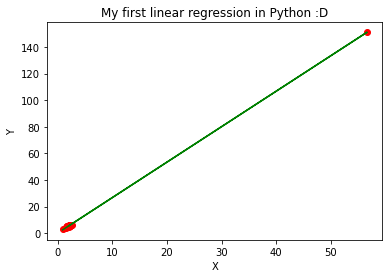

In [14]:
plt.scatter(df_eje["X"], df_eje["Y"], color = "red")
plt.plot(df_eje["X"],df_eje["X"]*resultados.params[1] + resultados.params[0], color = "green")
plt.title("My first linear regression in Python :D")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [15]:
resultados.params

const    0.002931
X        2.668848
dtype: float64

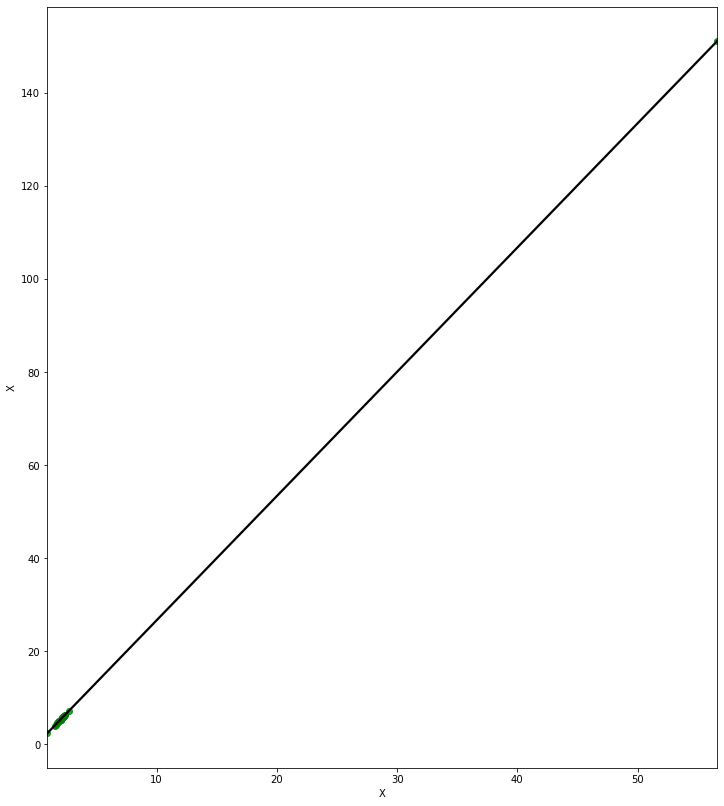

In [16]:
fig, ax = pyplot.subplots(figsize = (12,14))
sns.regplot(x = df_eje["X"],y = df_eje["X"]*resultados.params[1] + resultados.params[0], scatter_kws = {"color" : "green"},line_kws = {"color":"black"})